In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os
import pandas as pd

root = './experiments/lr_batch_20241109/results/'
files = os.listdir(root)



In [3]:
    res = yaml.safe_load(f)

In [43]:
def get_best_lrs(root):
    results = []
    split_id_to_perc = {
        'mnist': 100,
        'mnist_0_75': 75,
        'mnist_0_5': 50,
        'mnist_0_25': 25,
        'mnist_0_1': 10,
    }
    for file in os.listdir(root):
        with open(os.path.join(root, file), "r") as f:
            res = yaml.safe_load(f)
        best_metrics = res['best_metrics']
        lr = best_metrics['config']['train_loop_config']['optimizer_cfg']['args']['lr']
        lr_log = np.log(lr)
        results.append({
            'lr': best_metrics['config']['train_loop_config']['optimizer_cfg']['args']['lr'],
            'lr_log': lr_log,
            'epoch': best_metrics['epoch'],
            'val_loss': best_metrics['val_loss'],
            'split_perc': split_id_to_perc[res['config']['data_cfg']['split_id']]})
    results = pd.DataFrame(results)
    return results
        

In [44]:
results = get_best_lrs(root)

In [48]:
results_agg = results[['lr', 'lr_log', 'val_loss', 'split_perc']].groupby('split_perc').agg(
    {"lr": ["mean", "std"],
     "val_loss": ["mean", "std"],
     "lr_log": ["mean", "std"]})
results_agg['lr_log_exp', 'mean'] = np.exp(results_agg['lr_log', 'mean'])
results_agg['lr_log_exp', 'std'] = np.exp(results_agg['lr_log', 'std'])
results_agg

lr            val_loss              lr_log            \
                mean       std      mean       std      mean       std   
split_perc                                                               
10          0.010485  0.021342  0.011049  0.000808 -8.683894  3.985736   
25          0.008577  0.011781  0.008680  0.000805 -7.045546  3.145583   
50          0.002311  0.004985  0.006521  0.000288 -9.035595  3.083030   
75          0.007107  0.012139  0.006265  0.000396 -7.541997  3.341008   
100         0.005897  0.011892  0.005657  0.000229 -7.892691  2.803567   

           lr_log_exp             
                 mean        std  
split_perc                        
10           0.000169  53.824874  
25           0.000871  23.233209  
50           0.000119  21.824420  
75           0.000530  28.247584  
100          0.000373  16.503417

Text(0.5, 1.0, 'Optimal learning rate vs. dataset size')

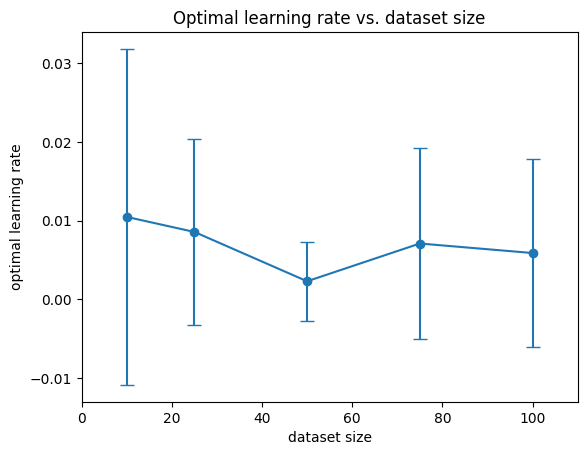

In [52]:
fig, ax = plt.subplots()
ax.scatter(x = results_agg.index,
           y = results_agg['lr', 'mean']) 
ax.errorbar(x = results_agg.index,
            y = results_agg['lr', 'mean'],
            yerr = results_agg['lr', 'std'],
            capsize=5)
ax.set_xlim(0, 110)
ax.set_xlabel("dataset size")
ax.set_ylabel("optimal learning rate")
ax.set_title("Optimal learning rate vs. dataset size")

Text(0.5, 1.0, 'validation loss vs. dataset size')

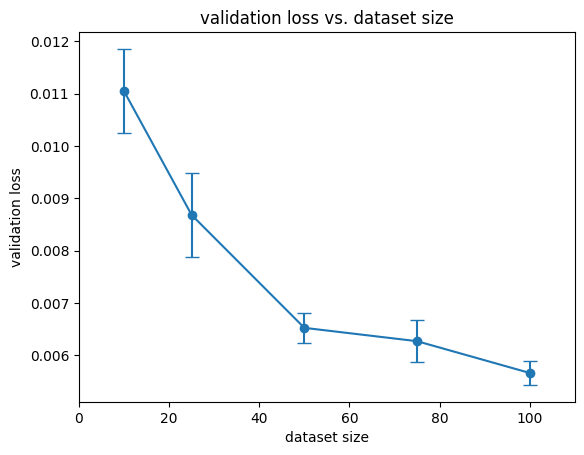

In [53]:

fig, ax = plt.subplots()
ax.scatter(x = results_agg.index,
           y = results_agg['val_loss', 'mean']) 
ax.errorbar(x = results_agg.index,
            y = results_agg['val_loss', 'mean'],
            yerr = results_agg['val_loss', 'std'],
            capsize=5)
ax.set_xlim(0, 110)
ax.set_xlabel("dataset size")
ax.set_ylabel("validation loss")
ax.set_title("validation loss vs. dataset size")